In [ ]:
import pandas as pd

oscar = pd.read_csv('the_oscar_award.csv')

netflix = pd.read_csv('netflix_titles.csv')

rotten_tomatoes_critic = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

rotten_tomatoes = pd.read_csv('rotten_tomatoes_movies.csv')

In [ ]:
# prompt: Crie um código que verifica ve se os filmes que estão na base de dados Netflix estão na base da dados rotten_tomatoes.

# Find movies in both Netflix and Rotten Tomatoes datasets
#common_movies = netflix[netflix['title'].isin(rotten_tomatoes['movie_title'])]

# Display the common movies
#print(common_movies)


                                    show_id     type                 title  \
15            m/dear_white_peoples5301s5301  TV Show     Dear White People   
27                    m/grown_upss7339s7339    Movie             Grown Ups   
28              m/dark_skies_2013s5173s5173    Movie            Dark Skies   
29                                      NaN    Movie              Paranoia   
38          m/birth_of_the_dragons3618s3618    Movie   Birth of the Dragon   
...                                     ...      ...                   ...   
8791                                    NaN    Movie           Young Adult   
8793  m/1024407-yours_mine_and_ourss825s825    Movie  Yours, Mine and Ours   
8802                                    NaN    Movie                Zodiac   
8804                                    NaN    Movie            Zombieland   
8805                                    NaN    Movie                  Zoom   

             director                                          

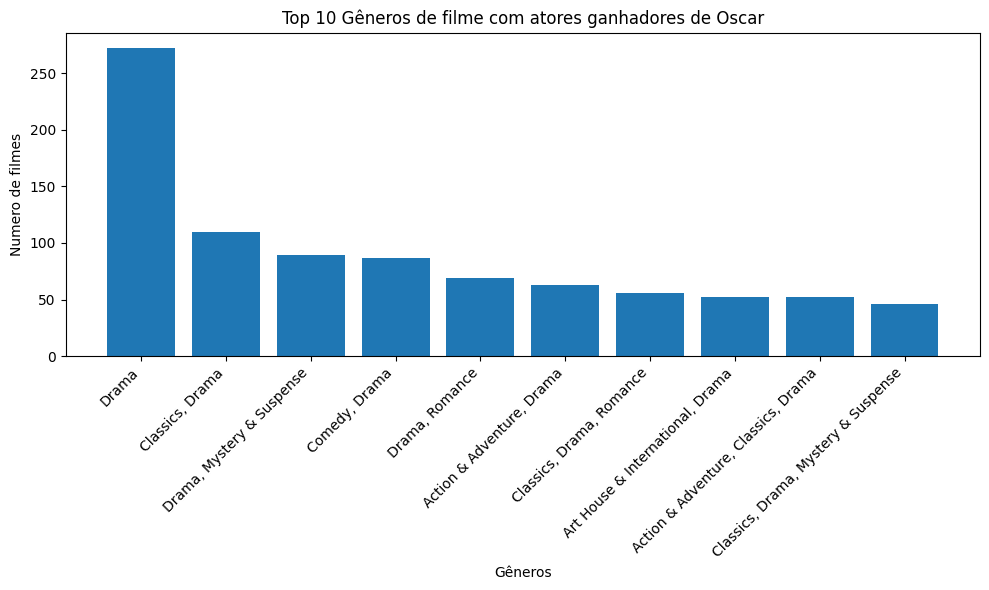

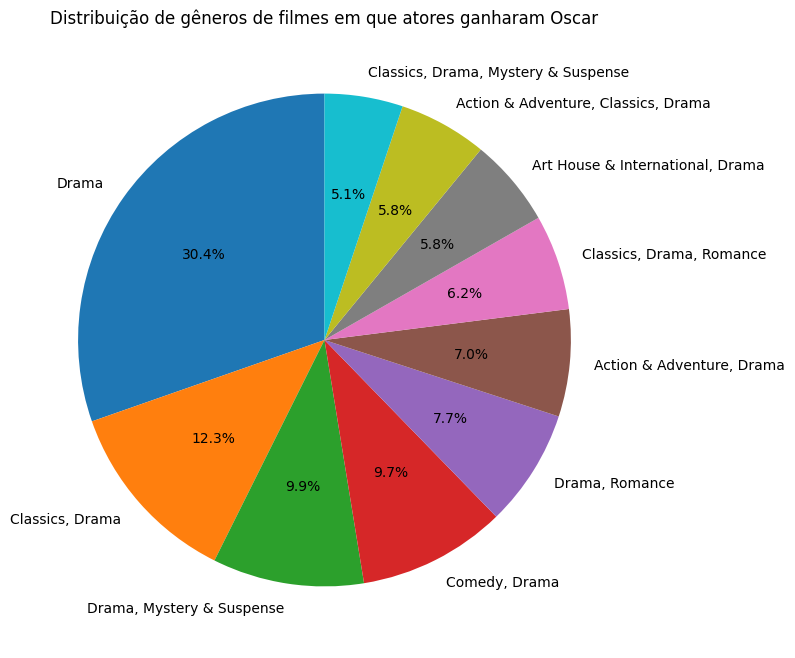

In [79]:
#Em qual Gênero de filme tendem a ter mais ganhadores de atores e atrizes ganhadores de Oscar

import matplotlib.pyplot as plt

oscar_films = oscar['film'].tolist()

common_movies = rotten_tomatoes[rotten_tomatoes['movie_title'].isin(oscar_films)]


genre_counts = common_movies['genres'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index[:10], genre_counts.values[:10])  # Show top 10 genres
plt.xlabel("Gêneros")
plt.ylabel("Numero de filmes")
plt.title("Top 10 Gêneros de filme com atores ganhadores de Oscar")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(genre_counts.values[:10], labels=genre_counts.index[:10], autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de gêneros de filmes em que atores ganharam Oscar")
plt.show()

#O gênero drama permite que os atores explorem uma amplitude emocional e complexidade de personagens que outros gêneros, como comédia ou ação, não costumam exigir. Filmes dramáticos frequentemente refletem a vida real, com dilemas internos e sentimentos como tristeza, raiva e perda, forçando os intérpretes a transmitir emoções de maneira crua e autêntica. Essas atuações exigem nuances sutis, como olhares e silêncios, que conectam o público aos conflitos profundos dos personagens. Diferente de gêneros focados em efeitos visuais ou humor, o drama oferece aos atores a oportunidade de criar interpretações ricas e multifacetadas, revelando suas habilidades em explorar a vulnerabilidade humana.

#É por isso que papéis dramáticos são frequentemente reconhecidos em premiações como o Oscar. A profundidade emocional e o foco na verdade interior dos personagens tornam as performances dramáticas mais intensas e memoráveis. Ao lidar com questões universais de forma íntima e visceral, o drama destaca a capacidade dos atores de viver o personagem, o que justifica sua dominância entre os vencedores de grandes prêmios.

In [72]:
oscar = pd.read_csv('the_oscar_award.csv')

oscar_ator = oscar[(oscar['category'] == 'ACTOR') | (oscar['category'] == 'ACTRESS')]

oscar_ator = oscar_ator[oscar_ator['winner'] == True]
oscar_ator

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
36,1928,1929,2,ACTOR,Warner Baxter,In Old Arizona,True
45,1928,1929,2,ACTRESS,Mary Pickford,Coquette,True
73,1929,1930,3,ACTOR,George Arliss,Disraeli,True
...,...,...,...,...,...,...,...
5099,1973,1974,46,ACTRESS,Glenda Jackson,A Touch of Class,True
5191,1974,1975,47,ACTOR,Art Carney,Harry and Tonto,True
5201,1974,1975,47,ACTRESS,Ellen Burstyn,Alice Doesn't Live Here Anymore,True
5299,1975,1976,48,ACTOR,Jack Nicholson,One Flew over the Cuckoo's Nest,True


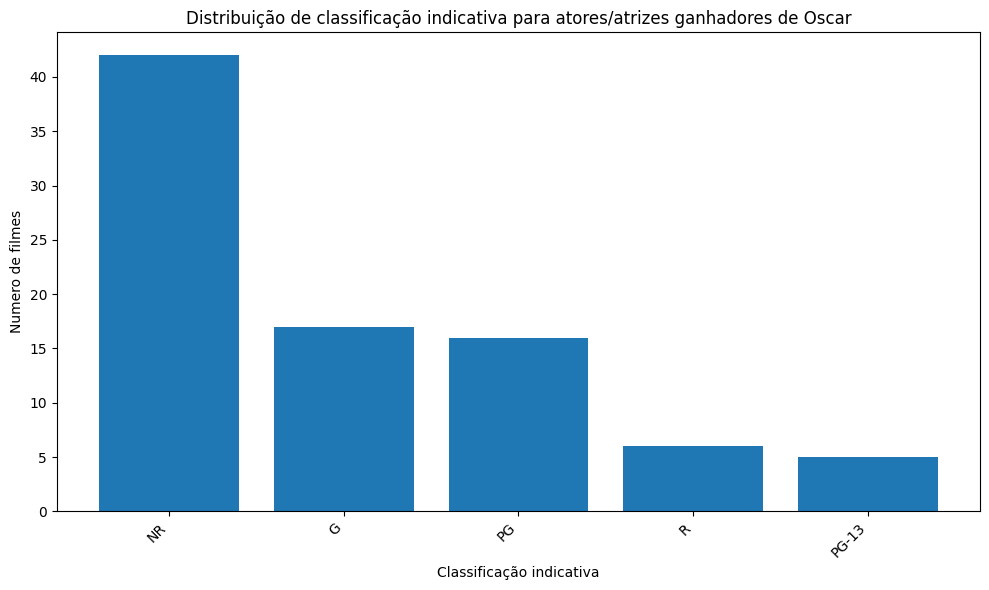

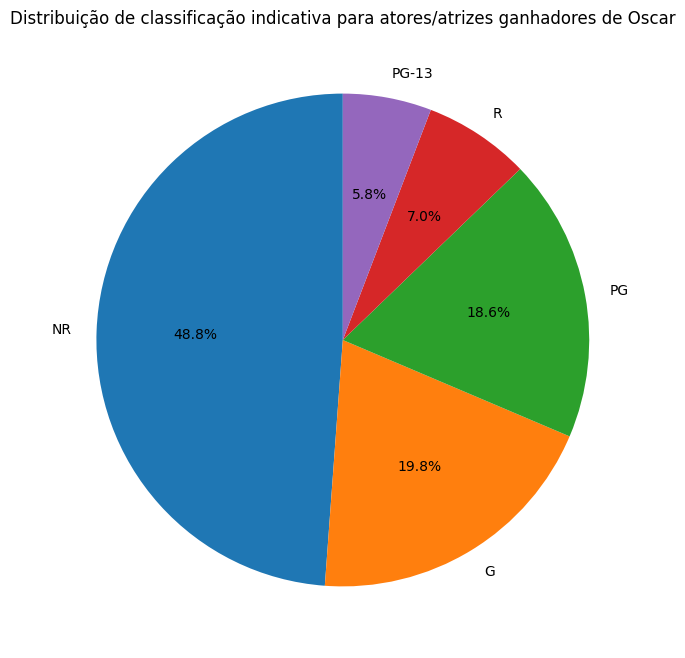

In [80]:
#Qual classificação indicativa tem mais atores e atriz com ganhadores de Oscar

merged_df = pd.merge(oscar_ator, rotten_tomatoes, left_on='film', right_on='movie_title', how='inner')

content_rating_counts = merged_df['content_rating'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(content_rating_counts.index, content_rating_counts.values)
plt.xlabel("Classificação indicativa")
plt.ylabel("Numero de filmes")
plt.title("Distribuição de classificação indicativa para atores/atrizes ganhadores de Oscar")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(content_rating_counts.values, labels=content_rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de classificação indicativa para atores/atrizes ganhadores de Oscar")
plt.show()

#A análise do gráfico revela que a maioria dos filmes com atores vencedores do Oscar possui classificação NR (Not Rated), o que sugere que muitos desses filmes são produções independentes ou antigas, que não se enquadravam nas normas de classificação modernas. Isso aponta para o fato de que a Academia tende a priorizar a qualidade artística e a profundidade narrativa, independentemente das restrições de conteúdo, focando mais em filmes que exploram aspectos emocionais e psicológicos.

#Por outro lado, filmes com classificação G e PG também têm forte presença, o que indica que produções acessíveis a públicos mais amplos e familiares são frequentemente reconhecidas. Em contraste, filmes com classificação R e PG-13, que lidam com temas mais maduros ou violentos, são menos representados. Isso sugere que a Academia tende a valorizar histórias mais universais ou dramas que capturam emoções intensas, mas de uma forma menos explícita, preferindo premiar filmes que alcançam um público mais amplo e têm apelo emocional universal.


In [84]:
# prompt: quero que voce pegue a coluna review_score da base de dados rotten_tomatoes e elimine os que estao sem valor

# Remove rows with missing values in the 'review_score' column
rotten_tomatoes_cleaned = rotten_tomatoes_critic.dropna(subset=['review_score'])
rotten_tomatoes_cleaned


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [108]:
# prompt: dentro de review_score tem notas que estão em letras quero que as tranforme para porcentagem, exemplo A+ = 10
rotten_tomatoes_cleaned = rotten_tomatoes_critic.dropna(subset=['review_score'])


def convert_score_to_percentage(score):
  if isinstance(score, str):
    if score == 'A+':
      return 100
    elif score == 'A':
      return 95
    elif score == 'A-':
      return 90
    elif score == 'B+':
      return 85
    elif score == 'B':
      return 80
    elif score == 'B-':
      return 75
    elif score == 'C+':
      return 70
    elif score == 'C':
      return 65
    elif score == 'C-':
      return 60
    elif score == 'D+':
      return 55
    elif score == 'D':
      return 50
    elif score == 'D-':
      return 45
    elif score == 'F':
      return 0
    else:
      try:
        # Try to convert to float
        return float(score)
      except ValueError:
        # If conversion fails, return NaN
        return float('nan')
  else:
    return score

rotten_tomatoes_cleaned['review_score'] = rotten_tomatoes_cleaned['review_score'].apply(convert_score_to_percentage)

def clean_review_score(score):
  if pd.isna(score):
    return 0
  elif score > 100:
    return score / 10
  else:
    return score

rotten_tomatoes_cleaned['review_score'] = rotten_tomatoes_cleaned['review_score'].apply(clean_review_score)

rotten_tomatoes_cleaned

<ipython-input-108-c37bbdb9fd3c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_cleaned['review_score'] = rotten_tomatoes_cleaned['review_score'].apply(convert_score_to_percentage)
<ipython-input-108-c37bbdb9fd3c>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_cleaned['review_score'] = rotten_tomatoes_cleaned['review_score'].apply(clean_review_score)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,0.0,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,0.0,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,0.0,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,80.0,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,0.0,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,0.0,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,0.0,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,85.0,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,0.0,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [107]:
rotten_tomatoes_cleaned = rotten_tomatoes_cleaned[rotten_tomatoes_cleaned['review_score'] != 0]

In [ ]:
for cod in rotten_tomatoes_critic['rotten_tomatoes_link']:
  for cod2 in rotten_tomatoes_cleaned['rotten_tomatoes_link']:
    if cod == cod2:
      rotten_tomatoes_cleaned['movie_title'] = rotten_tomatoes_critic['movie_title']
rotten_tomatoes_cleaned